<font color="#04B404"><h1 align="center">Machine Learning 2019-2020</h1></font>
<font color="#6E6E6E"><h2 align="center">Práctica 4: Support Vector Machines - El algoritmo SMO</h2></font>

En esta práctica vamos a implementar una versión simplificada del algoritmo SMO basada en <a href="http://cs229.stanford.edu/materials/smo.pdf">estas notas</a>. El algoritmo SMO original (<a href="https://www.microsoft.com/en-us/research/publication/sequential-minimal-optimization-a-fast-algorithm-for-training-support-vector-machines/">Platt, 1998</a>) utiliza una heurística algo compleja para seleccionar las alphas con respecto a las cuales optimizar. La versión que vamos a implementar simplifica el proceso de elección de las alphas, a costa de una convergencia más lenta. Una vez implementado, compararemos los resultados de nuestro algoritmo con los obtenidos usando la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> del paquete *sklearn.svm*.

Finalmente, utilizaremos la implementación de *sklearn* para resolver problemas sencillos de clasificación en dos dimensiones y visualizar fácilmente la frontera de decisión y el margen.

Todo el código que tienes que desarrollar lo debes incluir en el fichero *svm.py*, en los lugares indicados.



### Entrega:

La fecha tope para la entrega es el <font color="#931405">**19/12/2019 a las 23:59**</font>. Se debe subir a la plataforma moodle un único fichero comprimido con el siguiente contenido:

- El fichero *svm.py* con todo el código añadido para la realización de esta práctica.
- Este notebook con las respuestas a las preguntas planteadas al final.

### 1. Implementando los kernels

Lo primero que vamos a hacer es implementar las funciones que calculan los kernels. En el fichero *svm.py*, completa el código de las funciones *linear_kernel*, *poly_kernel* y *rbf_kernel*. Luego ejecuta las celdas siguientes, que comparan los resultados de estas funciones con funciones equivalentes de *sklearn*. 

In [1]:
# Imports
import numpy as np
import svm_sol as svm 
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Datos de prueba:
n = 10
m = 8
d = 4
x = np.random.randn(n, d)
y = np.random.randn(m, d)
print(x.shape)
print(y.shape)

(10, 4)
(8, 4)


#### 1.1. Kernel lineal

Completa el código de la función *linear_kernel* y comprueba tu solución.

In [3]:
# Con tu implementación:
K = svm.linear_kernel(x, y)
print("El array K deberia tener dimensiones: (%d, %d)" % (n, m))
print("A ti te sale un array con dimensiones:", K.shape)

# Con la implementación de sklearn:
K_ = polynomial_kernel(x, y, degree=1, gamma=1, coef0=1)

# Diferencia entre tu kernel y el de sklearn (deberia salir practicamente 0): 
maxdif = np.max(np.abs(K - K_))
print("Maxima diferencia entre tu implementacion y la de sklearn:", maxdif)

El array K deberia tener dimensiones: (10, 8)
A ti te sale un array con dimensiones: (10, 8)
Maxima diferencia entre tu implementacion y la de sklearn: 0.0


#### 1.2. Kernel polinómico

Completa el código de la función *poly_kernel* y comprueba tu solución.

In [4]:
# Con tu implementación:
K = svm.poly_kernel(x, y, deg=2, b=1)
print("El array K deberia tener dimensiones: (%d, %d)" % (n, m))
print("A ti te sale un array con dimensiones:", K.shape)

# Con la implementación de sklearn:
K_ = polynomial_kernel(x, y, degree=2, gamma=1, coef0=1)

# Diferencia entre tu kernel y el de sklearn (deberia salir practicamente 0): 
maxdif = np.max(np.abs(K - K_))
print("Maxima diferencia entre tu implementacion y la de sklearn:", maxdif)

El array K deberia tener dimensiones: (10, 8)
A ti te sale un array con dimensiones: (10, 8)
Maxima diferencia entre tu implementacion y la de sklearn: 0.0


#### 1.3. Kernel gausiano

Completa el código de la función *rbf_kernel* y comprueba tu solución.

In [5]:
s = 1.0

# Con tu implementación:
K = svm.rbf_kernel(x, y, sigma=s)
print("El array K deberia tener dimensiones: (%d, %d)" % (n, m))
print("A ti te sale un array con dimensiones:", K.shape)

# Con la implementación de sklearn:
K_ = rbf_kernel(x, y, gamma=1/(2*s**2))

# Diferencia entre tu kernel y el de sklearn (deberia salir practicamente 0): 
maxdif = np.max(np.abs(K - K_))
print("Maxima diferencia entre tu implementacion y la de sklearn:", maxdif)

El array K deberia tener dimensiones: (10, 8)
A ti te sale un array con dimensiones: (10, 8)
Maxima diferencia entre tu implementacion y la de sklearn: 1.6653345369377348e-16


### 2. El algoritmo SMO

A continuación vas a completar la clase SVM, que representa un clasificador basado en máquinas de vectores de soporte, y vas a implementar el algoritmo SMO dentro de esta clase.

#### 2.1. Implementa el método *evaluate_model*

Lo primero que debes hacer es completar el método *evaluate_model*, que recibe un array con los datos (atributos) del problema $x$ y calcula $f(x)$. Una vez que lo tengas, para comprobar que funciona bien, puedes ejecutar la siguiente celda de código:

In [6]:
# Datos de prueba (problema XOR):
x = np.array([[-1, -1], [1, 1], [1, -1], [-1, 1]])
y = np.array([1, 1, -1, -1])

# Alphas y b:
alpha = np.array([0.125, 0.125, 0.125, 0.125])
b = 0

# Clasificador, introducimos la solucion a mano:
svc = svm.SVM(C=1000, kernel="poly", sigma=1, deg=2, b=1)
svc.init_model(alpha, b, x, y)

# Clasificamos los puntos x:
y_ = svc.evaluate_model(x)

# Las predicciones deben ser exactamente iguales que las clases:
print("Predicciones (deberian ser [1, 1, -1, -1]):", y_)

Predicciones (deberian ser [1, 1, -1, -1]): [ 1.  1. -1. -1.]


#### 2.2. Completa el resto de métodos de la clase SVM

Completa los métodos *select_alphas*, *calculate_eta*, *update_alphas* y *update_b*. Cuando los tengas acabados, ejecuta las celdas siguientes para comprobar tu implementación.

La primera prueba consiste en entrenar el problema del XOR:

In [7]:
import importlib
importlib.reload(svm)

# Prueba con los datos del XOR:
x = np.array([[-1, -1], [1, 1], [1, -1], [-1, 1]])
y = np.array([1, 1, -1, -1])

# Clasificador que entrenamos para resolver el problema:
svc = svm.SVM(C=1000, kernel="poly", sigma=1, deg=2, b=1)
svc.simple_smo(x, y, maxiter = 100, verb=True)

# Imprimimos los alphas y el bias (deberian ser alpha_i = 0.125, b = 0):
print("alpha =", svc.alpha)
print("b =", svc.b)

# Clasificamos los puntos x (las predicciones deberian ser iguales a las clases reales):
y_ = svc.evaluate_model(x)
print("Predicciones =", y_)

Iteration (0 / 100), num. sv: 2
[0.125 0.    0.125 0.   ]
Iteration (1 / 100), num. sv: 3
[0.0625 0.0625 0.125  0.    ]
Iteration (2 / 100), num. sv: 3
[0.09375 0.0625  0.15625 0.     ]
Iteration (3 / 100), num. sv: 4
[0.09375 0.15625 0.15625 0.09375]
Iteration (4 / 100), num. sv: 4
[0.125   0.15625 0.15625 0.125  ]
Iteration (5 / 100), num. sv: 4
[0.125 0.125 0.125 0.125]
Todas las alfas satisfacen restricciones -- Fin
[0.125 0.125 0.125 0.125]
alpha = [0.125 0.125 0.125 0.125]
b = 0.0
Predicciones = [ 1.  1. -1. -1.]


La siguiente prueba genera un problema al azar y lo resuelve con tu método y con *sklearn*. Ambas soluciones deberían ser parecidas, aunque la tuya será mucho más lenta. Prueba con los diferentes tipos de kernels para comprobar tu implementación.

In [8]:
# Prueba con otros problemas y comparacion con sklearn:
from sklearn.svm import SVC

# Generacion de los datos:
n = 20
X = np.random.rand(n,2)
y = 2.0*(X[:,0] > X[:,1]) -1

# Uso de SVC:
clf = SVC(C=10.0, kernel='rbf', degree=2.0, coef0=1.0, gamma=0.5)
clf.fit(X, y)  
print("Resultados con sklearn:")
print("  -- Num. vectores de soporte =", clf.dual_coef_.shape[1])
print("  -- Bias b =", clf.intercept_[0])

# Uso de tu algoritmo:
svc = svm.SVM(C=10, kernel="rbf", sigma=1.0, deg=2.0, b=1.0)
svc.simple_smo(X, y, maxiter = 500, tol=1.e-15, verb=False, print_every=10)
print("Resultados con tu algoritmo:")
print("  -- Num. vectores de soporte =", svc.num_sv)
print("  -- Bias b =", svc.b)

# Comparacion entre las alphas:
a1 = clf.dual_coef_
a2 = (svc.alpha * y)[svc.is_sv]

# Maxima diferencia entre tus alphas y las de sklearn: 
maxdif = np.max(np.abs(np.sort(a1) - np.sort(a2)))
print("Maxima diferencia entre tus alphas y las de sklearn:", maxdif)

Resultados con sklearn:
  -- Num. vectores de soporte = 9
  -- Bias b = -0.3124580104801532
Todas las alfas satisfacen restricciones -- Fin
[10.         10.          0.         10.          0.          0.
  0.          0.         10.          0.          0.          0.01429915
 10.          0.          0.          0.          5.76805518  5.78235433
  0.         10.        ]
Resultados con tu algoritmo:
  -- Num. vectores de soporte = 9
  -- Bias b = -0.3122335750237797
Maxima diferencia entre tus alphas y las de sklearn: 0.004668443123669874


### 3. Visualización de modelos sencillos

Finalmente vamos a utilizar la implementación de *sklearn* para resolver problemas sencillos de clasificación en dos dimensiones. El objetivo es entender cómo funcionan los distintos tipos de kernel (polinómico y RBF) con problemas que se pueden visualizar fácilmente. 

Para implementar los modelos utilizaremos la clase <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> del paquete *sklearn.svm*. 

Primero importamos algunos módulos adicionales, establecemos el modo *inline* para las gráficas de *matplotlib* e inicializamos la semilla del generador de números aleatorios. El módulo *p4_utils* contiene funciones para generar datos en 2D y visualizar los modelos.

In [9]:
from p4_utils import *
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline
np.random.seed(19)

La siguiente celda realiza las siguientes acciones:

- Crea un problema con dos conjuntos de datos (entrenamiento y test) de 50 puntos cada uno, y dos clases (+1 y -1). La frontera que separa las clases es lineal. 

- Entrena un clasificador SVC para separar las dos clases, con un kernel lineal.

- Imprime los vectores de soporte, las alphas y el bias.

- Obtiene la tasa de acierto en training y en test.

- Y finalmente dibuja el modelo sobre los datos de entrenamiento y test. La línea negra es la frontera de separación, mientras que las líneas azul y roja representan los márgenes para las clases azul y roja respectivamente. Sobre la gráfica de entrenamiento muestra además los vectores de soporte.


Vectores de soporte:
   [2.187838, 1.399108]  c = -1
   [5.735428, 5.092927]  c = -1
   [3.194181, 3.747598]  c = 1
Coeficientes a_i:
   [[-1.31365967 -1.15023768  2.46389735]]
Coeficiente b:
   0.3514618426525484
Score train = 1.000000
Score test = 1.000000


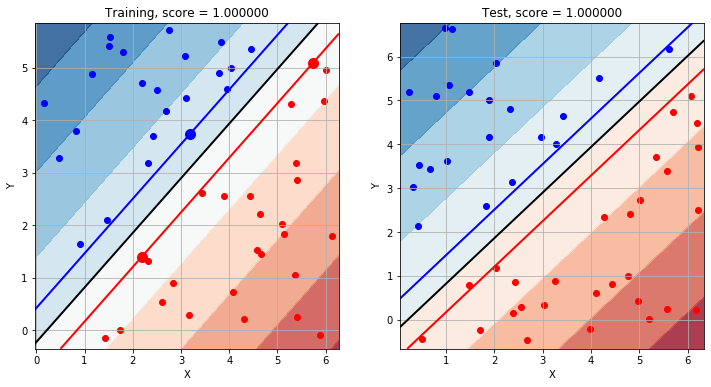

In [10]:
# Creación del problema, datos de entrenamiento y test:
np.random.seed(300)
n = 50
model = 'linear'
ymargin = 0.5
x, y = createDataSet(n, model, ymargin)
xtest, ytest = createDataSet(n, model, ymargin)

# Construcción del clasificador:
clf = SVC(C=10, kernel='linear', degree=1.0, coef0=1.0, gamma=0.1)
clf.fit(x, y)  

# Vectores de soporte:
print("Vectores de soporte:")
for i in clf.support_:
    print("   [%f, %f]  c = %d" % (x[i,0], x[i,1], y[i]))

# Coeficientes a_i y b:
print("Coeficientes a_i:")
print("  ", clf.dual_coef_)
print("Coeficiente b:")
print("  ", clf.intercept_[0])

# Calculo del acierto en los conjuntos de entrenamiento y test:
score_train = clf.score(x, y)
print("Score train = %f" % (score_train))
score_test = clf.score(xtest, ytest)
print("Score test = %f" % (score_test))

# Gráficas:
plt.figure(figsize=(12,6))

plt.subplot(121)
plotModel(x[:,0],x[:,1],y,clf,"Training, score = %f" % (score_train))
for i in clf.support_:
    if y[i] == -1:
        plt.plot(x[i,0],x[i,1],'ro',ms=10)
    else:
        plt.plot(x[i,0],x[i,1],'bo',ms=10)

plt.subplot(122)
plotModel(xtest[:,0],xtest[:,1],ytest,clf,"Test, score = %f" % (score_test))

#### Responde a las siguientes cuestiones:

**(1)** Escribe la ecuación de la frontera de decisión para este problema como combinación lineal de las funciones de kernel sobre cada uno de los vectores de soporte. Ten en cuenta que los coeficientes $a_{i}$ son el producto de la clase del punto y su multiplicador de Lagrange correspondiente: $a_{i} = \alpha_{i} t_{i}$. Por este motivo encontramos valores negativos.

- <font color="#931405">Tu respuesta aquí</font>

**(2)** Con el conjunto de datos anterior, prueba a entrenar el clasificador con un parámetro *C* igual a 0.01. ¿Se siguen clasificando bien todos los patrones? ¿Qué ocurre con el margen? ¿Qué pasa si bajas aún más el valor de *C* hasta 0.001? ¿Qué pasa con el margen si aumentamos mucho el parámetro C? Razona tus respuestas.

- <font color="#931405">Tu respuesta aquí</font>

**(3)** Genera un nuevo conjunto de datos manteniendo el modelo lineal pero cambiando el parámetro *ymargin* a -0.5. Como ves ahora el problema ya no es linealmente separable. Prueba a resolverlo con el clasificador inicial (con *C=10*) y luego prueba otros valores de C. ¿Qué ocurre con valores altos de *C*? ¿Y con valores bajos? ¿Qué ocurre con los vectores de soporte? 

- <font color="#931405">Tu respuesta aquí</font>

**(4)** Haz pruebas utilizando un kernel gausiano y variando los parámetros *C* y *gamma*. Comenta los resultados.

- <font color="#931405">Tu respuesta aquí</font>